# Quantium Data Analysis Task 1

## Importing Python Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from scipy.stats import ttest_ind

## Reading the CVS and Excel file into notebook

In [4]:
# This is the purchase behaviour dataset, it is a CSV file.
dfp = pd.read_csv(r'C:\Users\user\Downloads\Quantium\QVI_purchase_behaviour.csv')
dfp

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [5]:
# This is the transaction dataset it is an Excel file
dft = pd.read_excel(r'C:\Users\user\Downloads\Quantium\QVI_transaction_data.xlsx')
dft

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


### Exploratory Data Analysis for the Transaction Dataset

In [7]:
# checking out the first 10 rows of the transaction dataset
dft.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [8]:
# A summary of the transaction dataframe and its data type 
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [9]:
# changing that to date format 
#dft['DATE'] = pd.to_datetime(dft['DATE']).dt.date
dft['DATE'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(dft['DATE'], unit='D')
print(dft['DATE'].head())

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]


In [10]:
# This will list everything in the PROD_NAME column
dft['PROD_NAME'] 

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [11]:
# listing out all the unique products in the 'PROD_NAME' column
dft['PROD_NAME'].unique()    #.... this will list only the unique ones

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [12]:
# A count of  all the unique products in the 'PROD_NAME' column
dft['PROD_NAME'].nunique()

114

In [13]:
# the most common words by counting the number of times a word appears and sorting them by this frequency in order of highest to lowest frequency
# Get all product names in one list
all_names = ' '.join(dft['PROD_NAME'].unique())

# Split into words
words = all_names.split()

# Remove words with numbers or special characters
clean_words = [word.lower() for word in words if word.isalpha()]

# Count word frequency
word_count = Counter(clean_words)

# Show top 10 most common words
print(word_count.most_common(10))

[('chips', 21), ('smiths', 16), ('crinkle', 14), ('cut', 14), ('kettle', 13), ('cheese', 12), ('salt', 12), ('original', 10), ('chip', 9), ('salsa', 9)]


In [14]:
# Removing all the salsa products in the dataset
# Creating a new column that flags salsa products
dft['SALSA'] = dft['PROD_NAME'].str.lower().str.contains('salsa')

# Filtering out rows where SALSA is True
dft = dft[dft['SALSA'] == False]

# Drop the SALSA column
dft = dft.drop(columns='SALSA')


In [15]:
# The summary of the transaction dataset
dft.describe ()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


In [16]:
# From the summary table, we noticed an outlier, a customer bought 200 quantity of an item
# flitering the dataset using the quantity on 'LYLTY_CARD_NBR' to find this row(s)
dft[dft['PROD_QTY']>=200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [17]:
# checking for the other goods the customer purchase
# will be flitering by LYLTY_CARD_NBR because ot is unique to each customer
dft[dft['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [18]:
# Removing that specific customer from the data
dft = dft[dft['LYLTY_CARD_NBR'] != 226000]

In [19]:
# Grouping by date and counting the number of transactions that occurred each day
transaction_summary = dft.groupby('DATE').size().reset_index(name='Transaction_Count')
# Previewing the result
print(transaction_summary.head())

        DATE  Transaction_Count
0 2018-07-01                663
1 2018-07-02                650
2 2018-07-03                674
3 2018-07-04                669
4 2018-07-05                660


In [20]:
# Counting unique dates where transactions occurred
active_days = dft['DATE'].nunique()
print(f"Transactions occurred on {active_days} unique days.")

Transactions occurred on 364 unique days.


In [21]:
# Creating a full date range
full_dates = pd.date_range(start='2018-07-01', end='2019-06-30')
# Grouping by date and counting the number of transactions that occurred each day
transaction_summary = dft.groupby('DATE').size().reset_index(name='Transaction_Count')
# Converting full date range to DataFrame
full_dates_df = pd.DataFrame({'DATE': full_dates})

In [22]:
# Ensuring both DATE columns are in datetime format
full_dates_df['DATE'] = pd.to_datetime(full_dates_df['DATE'])
transaction_summary['DATE'] = pd.to_datetime(transaction_summary['DATE'])

In [23]:
# Merging with actual transactions
merged = pd.merge(full_dates_df, transaction_summary, on='DATE', how='left')
# Filling the missing transaction counts with 0
merged['Transaction_Count'] = merged['Transaction_Count'].fillna(0)

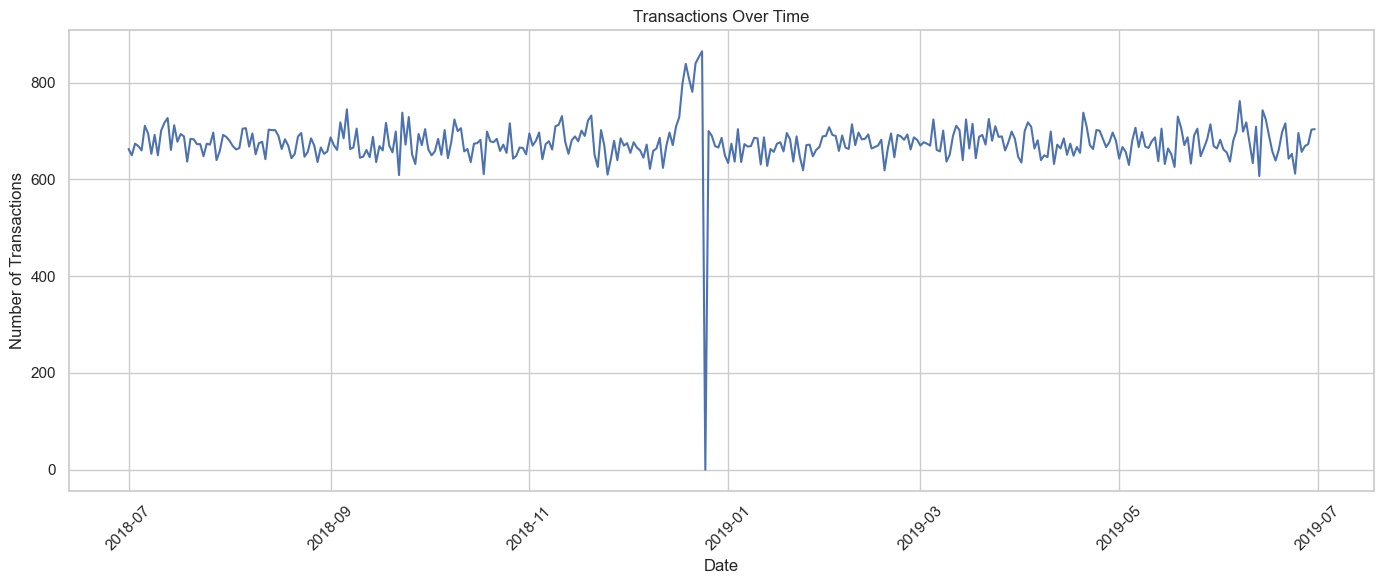

In [24]:
# Setting up plot style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Plotting for a  full year
sns.lineplot(data=merged, x='DATE', y='Transaction_Count')
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

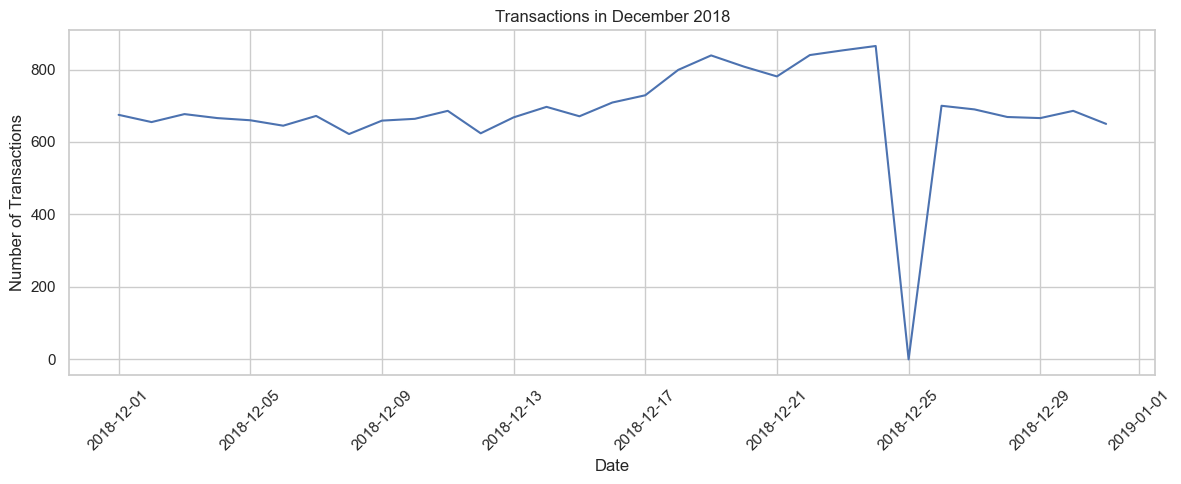

In [25]:
# Filtering December 2018
december_data = merged[(merged['DATE'] >= '2018-12-01') & (merged['DATE'] <= '2018-12-31')]

# Plotting for only December 2018
plt.figure(figsize=(12, 5))
sns.lineplot(data=december_data, x='DATE', y='Transaction_Count')
plt.title('Transactions in December 2018')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# We can see that no transaction happened on '2018-12-25', probably because it is Christmas Day

In [26]:
# This confirms the 'Transactions in December 2018' chart above
missing_dates = merged[merged['Transaction_Count'] == 0]['DATE']
print("Missing transaction date(s):", missing_dates.dt.strftime('%Y-%m-%d').tolist())

Missing transaction date(s): ['2018-12-25']


In [27]:
# Extracting pack size (first number in the product name)
dft['PACK_SIZE'] = dft['PROD_NAME'].str.extract(r'(\d+)').astype(float)

In [28]:
# Showing distinct pack sizes and how many times they occur
pack_size_counts = dft['PACK_SIZE'].value_counts().sort_index()
print(pack_size_counts)

PACK_SIZE
70.0      1507
90.0      3008
110.0    22387
125.0     1454
134.0    25102
135.0     3257
150.0    40203
160.0     2970
165.0    15297
170.0    19983
175.0    66390
180.0     1468
190.0     2995
200.0     4473
210.0     6272
220.0     1564
250.0     3169
270.0     6285
330.0    12540
380.0     6416
Name: count, dtype: int64


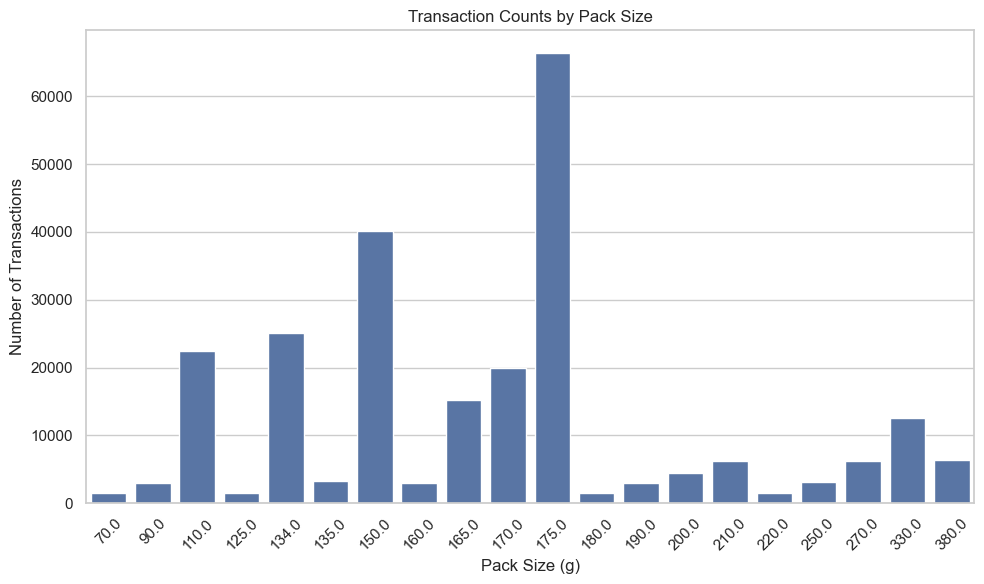

In [29]:
# Plotting Transaction Counts by Pack Size
plt.figure(figsize=(10, 6))
sns.countplot(x='PACK_SIZE', data=dft, order=sorted(dft['PACK_SIZE'].dropna().unique()))
plt.title('Transaction Counts by Pack Size')
plt.xlabel('Pack Size (g)')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
# Extracting the first word in the PROD_NAME column to get the brand
dft['BRAND'] = dft['PROD_NAME'].str.split().str[0]

In [31]:
# Standardize brand names
dft['BRAND'] = dft['BRAND'].replace({
    'RED': 'RRD',
    'SMITH': 'SMITHS',
    'GRNWVES': 'GRNWAVES',  # Example of likely typo
    'INFZNS': 'INFUZIONS',
    # Add more replacements as you observe them
})

In [32]:
# Viewing brand counts to verify results
print(dft['BRAND'].value_counts())

BRAND
Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64


### Exploratory Data Analysis for the Purchase Behaviour Dataset

In [34]:
# checking out the first five rows in the purchase behaviour dataset.
dfp.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [35]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [36]:
# trying to summarize the dataset but it is not needed
# the LYLTY_CARD_NBR column is unique and an identity number column, while LIFESTAGE and PREMIUM_CUSTOMER columns contain strings
dfp.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [37]:
# counting the values in the LIFESTAGE column
print(dfp['LIFESTAGE'].value_counts())

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64


In [38]:
# counting the values in the PREMIUM_CUSTOMER column
print(dfp['PREMIUM_CUSTOMER'].value_counts())

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64


### Merging both datasets

#### using the left join to merge the transaction dataset and the purchase behaviour dataset

In [41]:
# merging both dataset
merged = pd.merge(dft, dfp, on='LYLTY_CARD_NBR', how='left')

In [42]:
# checking the shape of the merged dataset and the transaction dataset
print(merged.shape)
print(dft.shape)

(246740, 12)
(246740, 10)


In [43]:
# Checking if any transactions don't have customer info
missing_customers = merged[merged.isnull().any(axis=1)]
print(f"Missing customer details: {missing_customers.shape[0]}")

Missing customer details: 0


In [44]:
# Saving the dataset for Task 2 or further analysis
merged.to_csv(r'C:\Users\user\Downloads\Quantium\QVI_data.csv', index=False)

In [45]:
merged.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget


#### Data Exploration 

In [47]:
# Total sales by segment
sales_by_segment = merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
# Sorting for cleaner plots
sales_by_segment = sales_by_segment.sort_values(by='TOT_SALES', ascending=False)

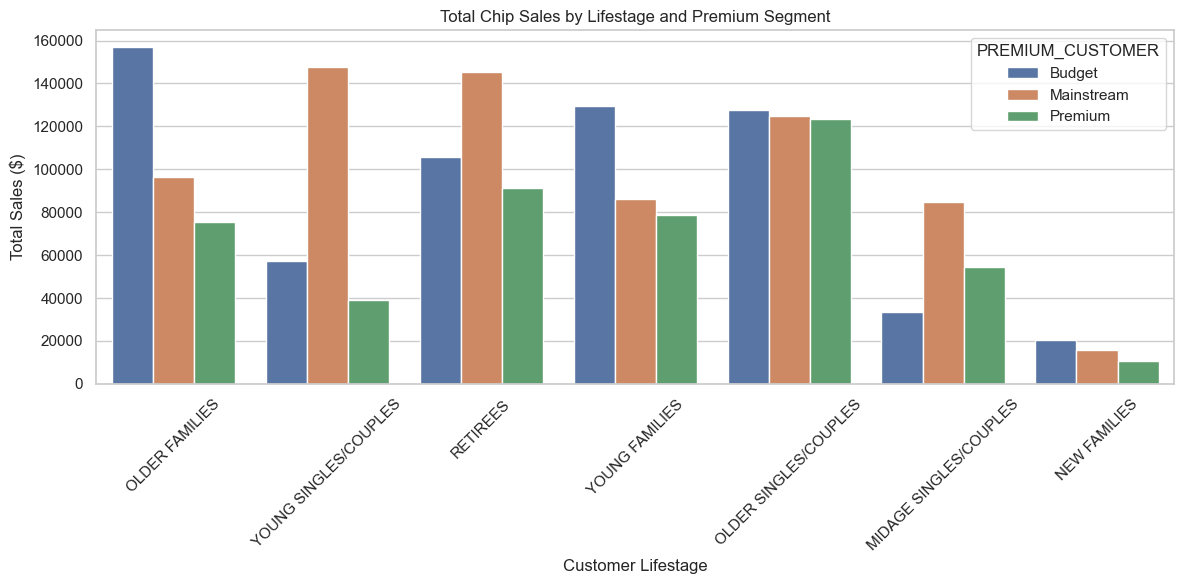

In [48]:
# Plotting 'Total Chip Sales by Lifestage and Premium'
plt.figure(figsize=(12,6))
sns.barplot(data=sales_by_segment, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.xticks(rotation=45)
plt.title('Total Chip Sales by Lifestage and Premium Segment')
plt.ylabel('Total Sales ($)')
plt.xlabel('Customer Lifestage')
plt.tight_layout()
plt.show()

In [49]:
# Getting unique customers in each segment
unique_customers = merged[['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']].drop_duplicates()
customers_by_segment = unique_customers.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].count().reset_index()
customers_by_segment.rename(columns={'LYLTY_CARD_NBR': 'Customer_Count'}, inplace=True)


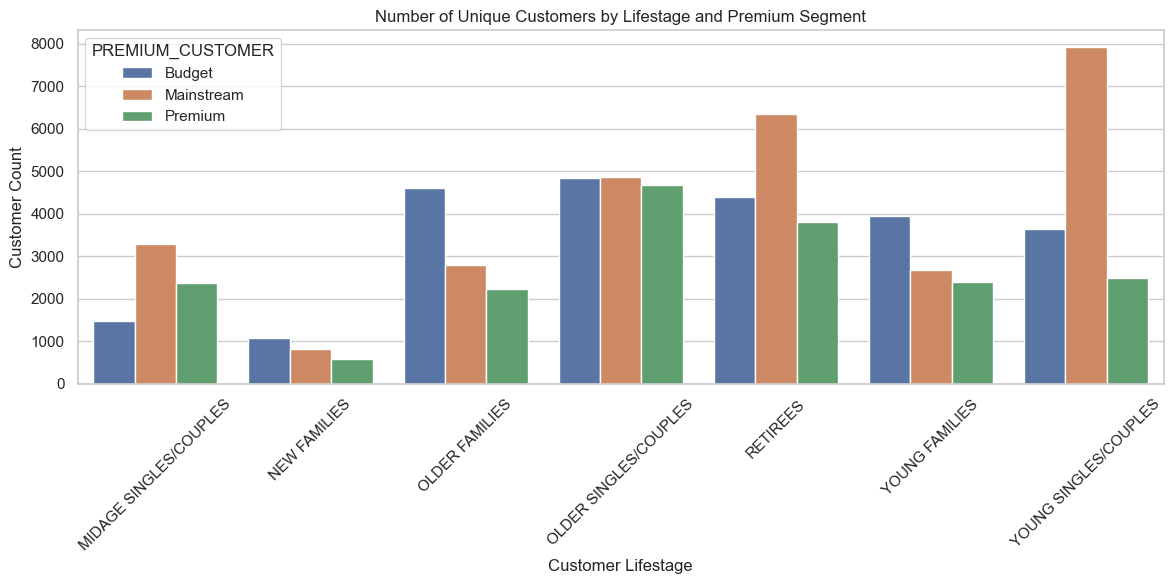

In [50]:
# Plotting Number of Unique Customers by Lifestage and Premium
plt.figure(figsize=(12,6))
sns.barplot(data=customers_by_segment, x='LIFESTAGE', y='Customer_Count', hue='PREMIUM_CUSTOMER')
plt.xticks(rotation=45)
plt.title('Number of Unique Customers by Lifestage and Premium Segment')
plt.ylabel('Customer Count')
plt.xlabel('Customer Lifestage')
plt.tight_layout()
plt.show()

In [51]:
# Total units and unique customer count per segment
units_per_customer = merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({
    'PROD_QTY': 'sum',
    'LYLTY_CARD_NBR': pd.Series.nunique
}).reset_index()

In [52]:
# Calculating average units per customer
units_per_customer['Avg_Units_Per_Customer'] = units_per_customer['PROD_QTY'] / units_per_customer['LYLTY_CARD_NBR']

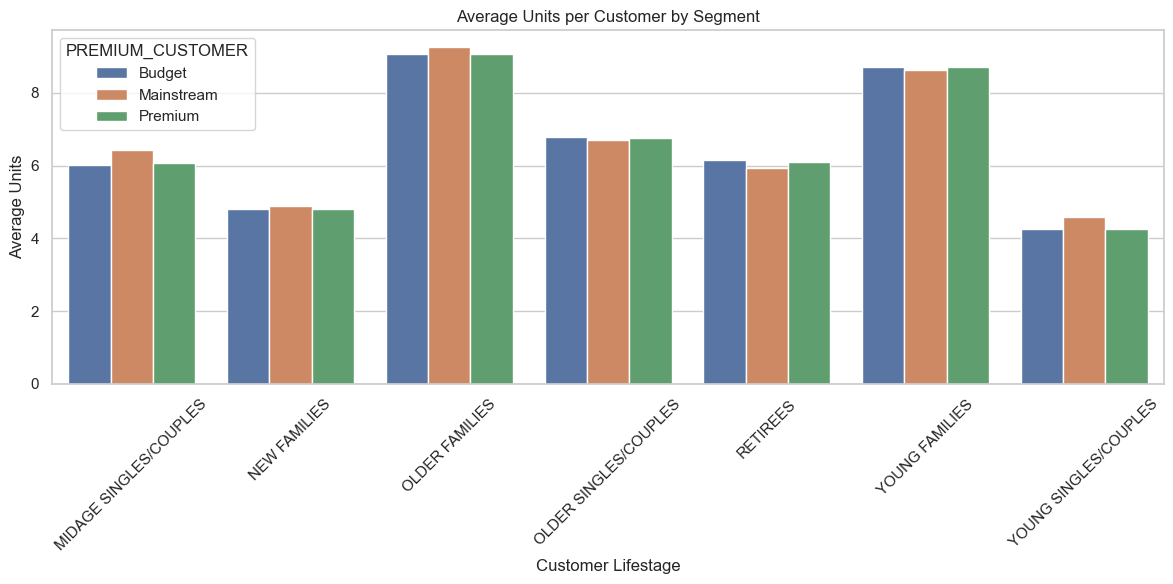

In [53]:
# Plotting Average Units per Customer by Segment
plt.figure(figsize=(12,6))
sns.barplot(data=units_per_customer, x='LIFESTAGE', y='Avg_Units_Per_Customer', hue='PREMIUM_CUSTOMER')
plt.xticks(rotation=45)
plt.title('Average Units per Customer by Segment')
plt.ylabel('Average Units')
plt.xlabel('Customer Lifestage')
plt.tight_layout()
plt.show()

In [54]:
# Total sales and total quantity per segment
avg_price_data = merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({
    'TOT_SALES': 'sum',
    'PROD_QTY': 'sum'
}).reset_index()

In [55]:
# Calculating average price per unit
avg_price_data['Avg_Price_Per_Unit'] = avg_price_data['TOT_SALES'] / avg_price_data['PROD_QTY']

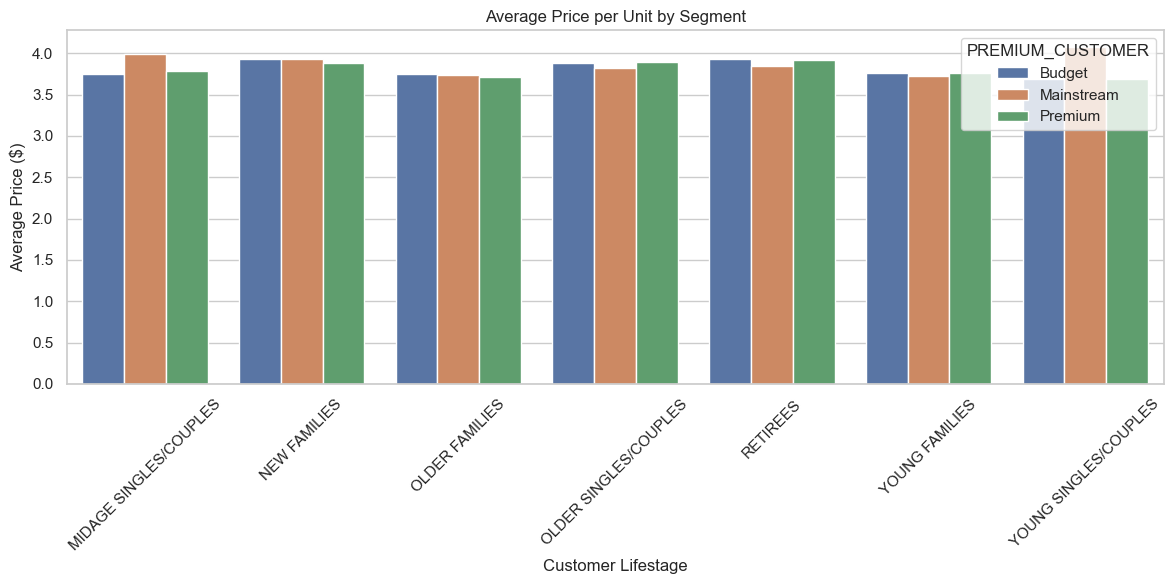

In [56]:
# Plotting Average Price per Unit by Segment
plt.figure(figsize=(12,6))
sns.barplot(data=avg_price_data, x='LIFESTAGE', y='Avg_Price_Per_Unit', hue='PREMIUM_CUSTOMER')
plt.xticks(rotation=45)
plt.title('Average Price per Unit by Segment')
plt.ylabel('Average Price ($)')
plt.xlabel('Customer Lifestage')
plt.tight_layout()
plt.show()

In [57]:
# Filtering target segments
mainstream = merged[
    (merged['PREMIUM_CUSTOMER'] == 'Mainstream') &
    (merged['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))
]
others = merged[
    (merged['PREMIUM_CUSTOMER'].isin(['Budget', 'Premium'])) &
    (merged['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))
]

In [58]:
# Filtering target segments with .copy() to avoid SettingWithCopyWarning
mainstream = merged[
    (merged['PREMIUM_CUSTOMER'] == 'Mainstream') &
    (merged['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))
].copy()

others = merged[
    (merged['PREMIUM_CUSTOMER'].isin(['Budget', 'Premium'])) &
    (merged['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))
].copy()

# Now it's safe to add new columns
mainstream['Unit_Price'] = mainstream['TOT_SALES'] / mainstream['PROD_QTY']
others['Unit_Price'] = others['TOT_SALES'] / others['PROD_QTY']

# Performing t-test
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(mainstream['Unit_Price'].dropna(), others['Unit_Price'].dropna())

print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 37.83196107667815, P-value: 2.235645611549355e-309


In [59]:
# Filtering data for the segment
target_group = merged[
    (merged['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
    (merged['PREMIUM_CUSTOMER'] == 'Mainstream')
]

# Grouping by brand
brand_pref = target_group['BRAND'].value_counts(normalize=True).reset_index()
brand_pref.columns = ['BRAND', 'Target_Percentage']

# Comparing with rest of population
rest_group = merged[
    ~((merged['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
      (merged['PREMIUM_CUSTOMER'] == 'Mainstream'))
]

In [60]:
rest_brand_pref = rest_group['BRAND'].value_counts(normalize=True).reset_index()
rest_brand_pref.columns = ['BRAND', 'Rest_Percentage']

# Merging and calculate difference
brand_compare = pd.merge(brand_pref, rest_brand_pref, on='BRAND')
brand_compare['Affinity_Score'] = brand_compare['Target_Percentage'] - brand_compare['Rest_Percentage']

# Sorting by highest affinity
brand_compare.sort_values(by='Affinity_Score', ascending=False, inplace=True)
print(brand_compare.head(10))

        BRAND  Target_Percentage  Rest_Percentage  Affinity_Score
0      Kettle           0.196684         0.164809        0.031875
2     Doritos           0.106222         0.087876        0.018346
1    Pringles           0.118451         0.100297        0.018154
6    Twisties           0.046050         0.037650        0.008400
7    Tostitos           0.045538         0.037769        0.007769
10   Tyrrells           0.031672         0.025630        0.006042
8        Cobs           0.044208         0.038861        0.005347
5   Infuzions           0.049222         0.044433        0.004789
11      Grain           0.029472         0.025071        0.004401
4       Thins           0.059660         0.056819        0.002841


In [61]:
# Targeting group pack size
pack_target = target_group['PACK_SIZE'].value_counts(normalize=True).reset_index()
pack_target.columns = ['PACK_SIZE', 'Target_Perc']

# Rest group pack size
pack_rest = rest_group['PACK_SIZE'].value_counts(normalize=True).reset_index()
pack_rest.columns = ['PACK_SIZE', 'Rest_Perc']

In [62]:
# Merging
pack_compare = pd.merge(pack_target, pack_rest, on='PACK_SIZE')
pack_compare['Affinity'] = pack_compare['Target_Perc'] - pack_compare['Rest_Perc']

# Sorting
pack_compare.sort_values(by='Affinity', ascending=False, inplace=True)
print(pack_compare.head(10))

    PACK_SIZE  Target_Perc  Rest_Perc  Affinity
2       134.0     0.118451   0.100297  0.018154
3       110.0     0.104943   0.089509  0.015434
5       330.0     0.061144   0.049935  0.011209
8       270.0     0.031723   0.024934  0.006789
7       380.0     0.032030   0.025485  0.006546
9       210.0     0.029472   0.025071  0.004401
10      135.0     0.014838   0.013059  0.001779
11      250.0     0.014327   0.012716  0.001611
4       170.0     0.080587   0.081023 -0.000435
16      180.0     0.003582   0.006153 -0.002572
